In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import cv2
import os
import time
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, LeakyReLU, Conv2D
import random
import time
import json

2.11.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

jpg_folder_path = "/content/drive/MyDrive/tesis_fleb_mri/mri"
dest_folder_path = "/content/drive/MyDrive/tesis_fleb_mri/mri"

with os.scandir(jpg_folder_path) as it:
    jpg_files = list(it)

file_names = [x.name for x in jpg_files]

import json
with open("/content/drive/MyDrive/tesis_fleb_mri/json_dump", "w") as fp:
  json.dump(file_names, fp)


In [5]:
jpg_folder_path = "/content/drive/MyDrive/tesis_fleb_mri/mri"

with open("/content/drive/MyDrive/tesis_fleb_mri/json_dump", "r") as fp:
  jpg_files = json.load(fp)

print("Dataframe length:")
print(len(jpg_files))


files = os.listdir(jpg_folder_path)
print("directory length:")
print(len(files))

random.shuffle(jpg_files)

n_samples = 1441
width = 112
height = 112
dim = (width, height)
mri_images = np.empty((n_samples, height, width), dtype=np.float32)

i = 0
for jpg_file in jpg_files:
    if i == n_samples:
        break
    start = time.time()
    mri_image = cv2.imread(jpg_folder_path + '/' + jpg_file, 0)
    print(time.time()-start)
    if mri_image.shape[0] == 0 or mri_image.shape[1] == 0:
        print("Skipping invalid mri image:", path)
        continue
    mri_image_resized = cv2.resize(mri_image, dim) 
    mri_images[i] = mri_image_resized

    i += 1

with open(f'/content/drive/MyDrive/tesis_fleb_mri/data_{n_samples}.npy', 'wb') as f:
    np.save(f, mri_images)

print("Dataframe shape:")
mri_images.shape

Dataframe length:
1441
directory length:
1441
0.6106564998626709
0.44939470291137695
0.2472827434539795
0.23495173454284668
0.578563928604126
0.540579080581665
0.48481082916259766
0.244781494140625
0.5058822631835938
0.6357243061065674
0.2346782684326172
0.2214183807373047
0.3979930877685547
0.5633330345153809
2.733391761779785
10.143211126327515
0.009667634963989258
0.008991718292236328
0.006653308868408203
0.008732318878173828
0.00854945182800293
0.008496284484863281
0.008883237838745117
0.009009838104248047
0.008907556533813477
0.008803367614746094
0.011340141296386719
0.008819341659545898
0.013480186462402344
0.010129451751708984
0.023290634155273438
0.010234594345092773
0.0067174434661865234
0.007083892822265625
0.007732868194580078
0.013232707977294922
0.0060384273529052734
0.0077397823333740234
0.008076667785644531
0.00856471061706543
0.007309913635253906
0.008533000946044922
0.00838470458984375
0.008551359176635742
0.00931096076965332
0.008788824081420898
0.009039640426635742
0

(1441, 112, 112)

In [6]:
n_samples = 1441

with open(f'/content/drive/MyDrive/tesis_fleb_mri/data_{n_samples}.npy', 'rb') as f:
    mri_images = np.load(f)

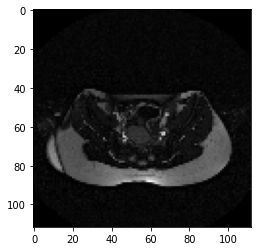

In [7]:
plt.imshow(mri_images[0], cmap='gray')

In [8]:
train_images = mri_images.reshape(mri_images.shape[0], 112, 112, 1).astype('float32')

train_images = (train_images - 127.5) / 127.5

BUFFER_SIZE = 6000
BATCH_SIZE = 16
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

print(train_images.shape)
print(np.min(train_images))
print(np.max(train_images))

(1441, 112, 112, 1)
-1.0
1.0


In [9]:
# # 4 LAYER
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, LeakyReLU

# def make_generator_model():
#     model = Sequential()
#     model.add(Dense(56*56*64, use_bias=False, input_shape=(100,)))
#     model.add(LeakyReLU(alpha=0.01))
#     model.add(Reshape((56, 56, 64)))
#     model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='tanh'))
#     return model

In [10]:
# # 7 LAYER
# from tensorflow.keras import Sequential
# from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU

# def make_generator_model():
#     model = Sequential()
#     model.add(Dense(28*28*256, use_bias=False, input_shape=(100,)))

#     model.add(Reshape((28, 28, 256)))

#     model.add(Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU(alpha=0.01))

#     model.add(Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same'))
#     model.add(BatchNormalization())
#     model.add(LeakyReLU(alpha=0.01))

#     model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='tanh'))

#     return model

In [11]:
# 15 LAYER
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, BatchNormalization, LeakyReLU


def make_generator_model():
    model = Sequential()
    model.add(Dense(14*14*256, use_bias=False, input_shape=(100,)))

    model.add(Reshape((14, 14, 256)))

    model.add(Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2DTranspose(64, (5, 5), strides=(1, 1), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', activation='tanh'))

    return model

In [12]:
generator = make_generator_model()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50176)             5017600   
                                                                 
 reshape (Reshape)           (None, 14, 14, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 28, 28, 256)      1638656   
 nspose)                                                         
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 28, 28, 256)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 128)      8

(1, 112, 112, 1)


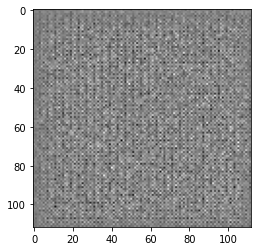

In [13]:
noise_dim = 100
noise = tf.random.normal([1, noise_dim])
generated_image = generator(noise, training=False)

print(generated_image.shape)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, LeakyReLU, Conv2D

def make_discriminator_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), strides=(2, 2), padding='same',
                                   input_shape=[112, 112, 1]))
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.01))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

In [15]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print(decision)

discriminator.summary()

tf.Tensor([[0.4999954]], shape=(1, 1), dtype=float32)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 32)        832       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 56, 56, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 28, 28, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       204928    


In [16]:
train_images.shape

(1441, 112, 112, 1)

In [17]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [18]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [19]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [20]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)

discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [21]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

In [22]:
grid_size_x= 10
grid_size_y= 10
seed = tf.random.normal([grid_size_x*grid_size_y , noise_dim])

def train(dataset, epochs):
  gen_loss_array = np.zeros([epochs], dtype=float)
  disc_loss_array = np.zeros([epochs], dtype=float)

  gen_aux = np.zeros([len(dataset)], dtype=float)
  disc_aux = np.zeros([len(dataset)], dtype=float)

  for epoch in range(epochs):
    start = time.time()

    i = 0
    for image_batch in dataset:

      gen_loss, disc_loss = train_step(image_batch)
      
      gen_aux[i] = gen_loss.numpy()
      disc_aux[i] = disc_loss.numpy()

      i += 1

    generate_images(generator, seed)
    print("Generator loss: ")
    gen_loss_array[epoch] = np.average(gen_aux)
    print(gen_loss_array[epoch])

    print("Discriminator loss: ")
    disc_loss_array[epoch] = np.average(disc_aux)
    print(disc_loss_array[epoch])

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  generate_images(generator, seed)

  return gen_loss_array, disc_loss_array

In [23]:
def generate_images(model, test_input):

  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(grid_size_x,grid_size_y))
  for i in range(predictions.shape[0]):
      plt.subplot(grid_size_x, grid_size_y, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')
  
  plt.show()

In [24]:
EPOCHS = 100
print(f'SAMPLES: {n_samples}')
print(f'EPOCHS: {EPOCHS}')
gen_loss_array, disc_loss_array = train(train_dataset, EPOCHS)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
# # SAVE MODEL

# generator.save(f'/content/drive/MyDrive/models/generator_mri-{n_samples}samples-{EPOCHS}epochs')
# discriminator.save(f'/content/drive/MyDrive/models/discriminator_mri-{n_samples}samples-{EPOCHS}epochs')
# f'/content/drive/MyDrive/models/generator_mri-{n_samples}samples-{EPOCHS}epochs'

In [26]:
from keras.applications.inception_v3 import preprocess_input

grid_size_x= 10
grid_size_y= 10
seed = tf.random.normal([grid_size_x*grid_size_y, noise_dim])

n = grid_size_x*grid_size_y

generated_images = generator(seed, training=False)
print(generated_images.shape)
generated_images = generated_images.numpy().reshape((n, 112, 112, 1))
generated_images = generated_images.astype('float32')
generated_images = preprocess_input(generated_images)
print(generated_images.shape)

real_images = mri_images[0:n].reshape((n, 112, 112, 1))
real_images = real_images.astype('float32')
real_images = preprocess_input(real_images)
real_images.shape

(100, 112, 112, 1)
(100, 112, 112, 1)


(100, 112, 112, 1)

In [27]:
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy.random import random
from scipy.linalg import sqrtm
 
def calculate_fid(act1, act2):
 mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
 mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
 ssdiff = np.sum((mu1 - mu2)**2.0)
 covmean = sqrtm(sigma1.dot(sigma2))
 if iscomplexobj(covmean):
  covmean = covmean.real
 fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
 return fid
 
act1 = random(10*2048)
act1 = act1.reshape((10,2048))
act2 = random(10*2048)
act2 = act2.reshape((10,2048))
fid = calculate_fid(act1, act1)
print('FID (same): %.3f' % fid)
fid = calculate_fid(act1, act2)
print('FID (different): %.3f' % fid)

FID (same): -0.000
FID (different): 355.904


In [28]:
fid = calculate_fid(real_images[0, :, :, 0], generated_images[0, :, :, 0])
fid

8.638780742652337

In [29]:
fids = np.zeros([n*n], dtype=float)
f = 0

for i, real_image in enumerate(real_images):
  for j, genereated_image in enumerate(generated_images):
    fids[f] = calculate_fid(real_images[i, :, :, 0], generated_images[j, :, :, 0])
    
    f += 1

print(f'Samples: {n_samples}')
print(f'Epochs: {EPOCHS}')
fids = fids[~np.isnan(fids)]
print(f'FID: {np.average(fids)}')

Samples: 1441
Epochs: 100
FID: 6.314675076485587


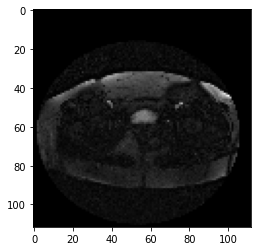

In [30]:
plt.imshow(real_images[59, :, :, 0], cmap='gray')

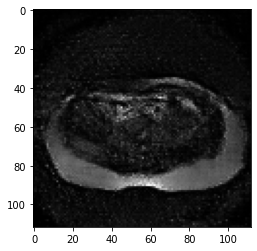

In [31]:
plt.imshow(generated_images[4, :, :, 0], cmap='gray')

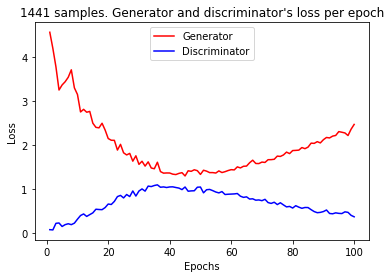

In [32]:
plt.title(f"{n_samples} samples. Generator and discriminator's loss per epoch")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(1, EPOCHS + 1), gen_loss_array, color ="red", label='Generator')
plt.plot(range(1, EPOCHS + 1), disc_loss_array, color ="blue", label='Discriminator')
leg = plt.legend(loc='upper center')
plt.show()

In [33]:
# # LOAD MODEL

# n_samples = 1441
# EPOCHS = 100
# noise_dim = 100
# grid_size_x= 10
# grid_size_y= 10
# seed = tf.random.normal([grid_size_x*grid_size_y , noise_dim])

# generator = keras.models.load_model(f'/content/drive/MyDrive/models/generator_save-{n_samples}samples-{EPOCHS}epochs')
# discriminator = keras.models.load_model(f'/content/drive/MyDrive/models/discriminator_save-{n_samples}samples-{EPOCHS}epochs')

# # generated_images = generator(seed, training=False)
# # plt.imshow(generated_images[4, :, :, 0], cmap='gray')
